In [1]:
url = "https://archive.ics.uci.edu/static/public/492/metro+interstate+traffic+volume.zip"

In [2]:
import requests

response = requests.get(url)

In [3]:
response

<Response [200]>

In [4]:
response.status_code

200

In [5]:
# response.content

In [6]:
with open("Metro Interstate Traffic Volume.zip", "wb") as f:
    f.write(response.content)

In [7]:
import zipfile

In [8]:
with zipfile.ZipFile("Metro Interstate Traffic Volume.zip") as zipped:
    zipped.extractall("Metro Interstate Traffic Volume")

In [9]:
import pandas as pd

In [10]:
i_94 = pd.read_csv(r"C:\Users\hp 840g6\OneDrive\Desktop\Data Visualization\Session 7\HomeWork\Metro Interstate Traffic Volume\Metro_Interstate_Traffic_Volume.csv\Metro_Interstate_Traffic_Volume.csv")

In [11]:
i_94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [12]:
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [13]:
i_94.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [14]:
import matplotlib.pyplot as plt 

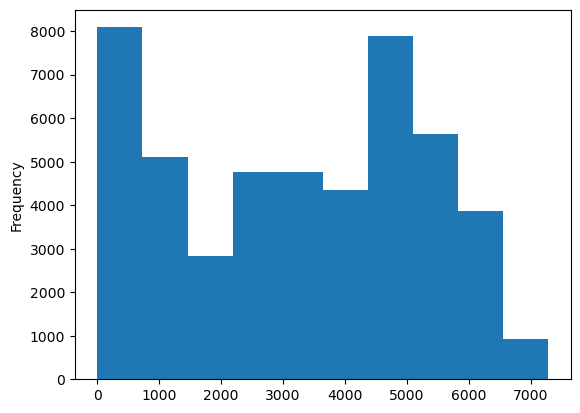

In [15]:
i_94.traffic_volume.plot.hist()
plt.show()

In [16]:
i_94.traffic_volume.describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

* Day: 7AM to 7PM (12 hours)
* Night: 7PM to 7AM (12 hours)

In [17]:
i_94.date_time = pd.to_datetime(i_94.date_time)

In [18]:
i_94.date_time.dtype

dtype('<M8[ns]')

In [19]:
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [20]:
i_94.date_time

0       2012-10-02 09:00:00
1       2012-10-02 10:00:00
2       2012-10-02 11:00:00
3       2012-10-02 12:00:00
4       2012-10-02 13:00:00
                ...        
48199   2018-09-30 19:00:00
48200   2018-09-30 20:00:00
48201   2018-09-30 21:00:00
48202   2018-09-30 22:00:00
48203   2018-09-30 23:00:00
Name: date_time, Length: 48204, dtype: datetime64[ns]

In [21]:
night_bol = (i_94.date_time.dt.hour >= 19) | (i_94.date_time.dt.hour <= 7)

In [22]:
night = i_94[night_bol]
night

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
10,None,290.97,0.0,0.0,20,Clouds,few clouds,2012-10-02 19:00:00,3539
11,None,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784
12,None,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361
13,None,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529
14,None,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [23]:
night.date_time.min()

Timestamp('2012-10-02 19:00:00')

In [24]:
night.date_time.max()

Timestamp('2018-09-30 23:00:00')

In [25]:
night.date_time.dt.time.min()

datetime.time(0, 0)

In [26]:
night.date_time.dt.time.max()

datetime.time(23, 0)

In [27]:
night.date_time.dt.hour.unique()

array([19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6,  7], dtype=int64)

In [28]:
day_bol = (i_94.date_time.dt.hour >= 7) & (i_94.date_time.dt.hour <= 19)

In [29]:
day = i_94[day_bol]
day

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302
48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283
48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132
48198,None,284.20,0.25,0.0,75,Rain,light rain,2018-09-30 18:00:00,3947


In [30]:
day.date_time.min()

Timestamp('2012-10-02 09:00:00')

In [31]:
day.date_time.max()

Timestamp('2018-09-30 19:00:00')

In [32]:
day.date_time.dt.time.min()

datetime.time(7, 0)

In [33]:
day.date_time.dt.time.max()

datetime.time(19, 0)

In [34]:
day.date_time.dt.hour.unique()

array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  8,  7], dtype=int64)

In [35]:
day.date_time.dt.hour.unique()

array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  8,  7], dtype=int64)

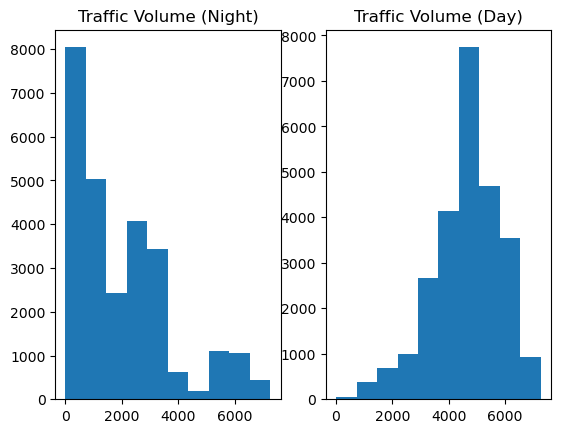

In [36]:
plt.subplot(1, 2, 1)
plt.hist(night["traffic_volume"])
plt.title("Traffic Volume (Night)")


plt.subplot(1, 2, 2)
plt.hist(day["traffic_volume"])
plt.title("Traffic Volume (Day)")


plt.show()

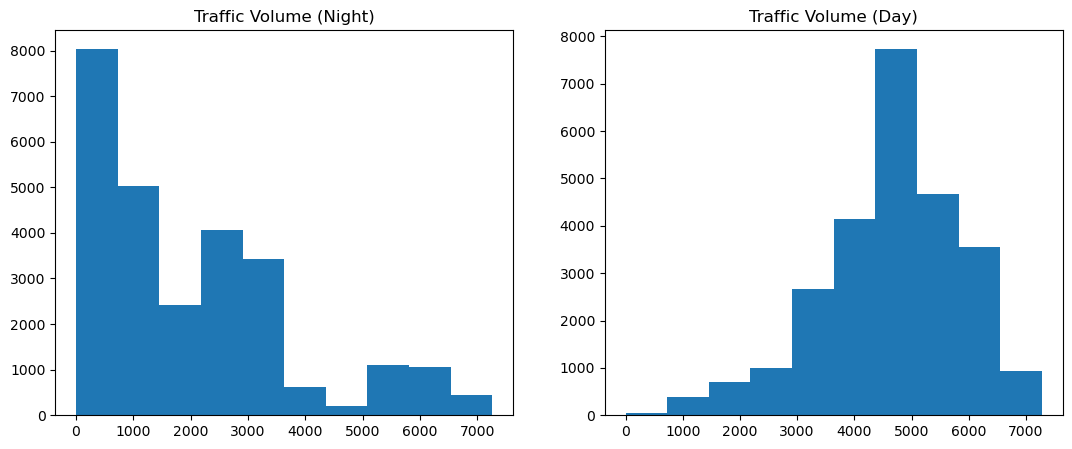

In [37]:
plt.figure(figsize= (13, 5))
                # width  height
plt.subplot(1, 2, 1)
plt.hist(night["traffic_volume"])
plt.title("Traffic Volume (Night)")


plt.subplot(1, 2, 2)
plt.hist(day["traffic_volume"])
plt.title("Traffic Volume (Day)")


plt.show()

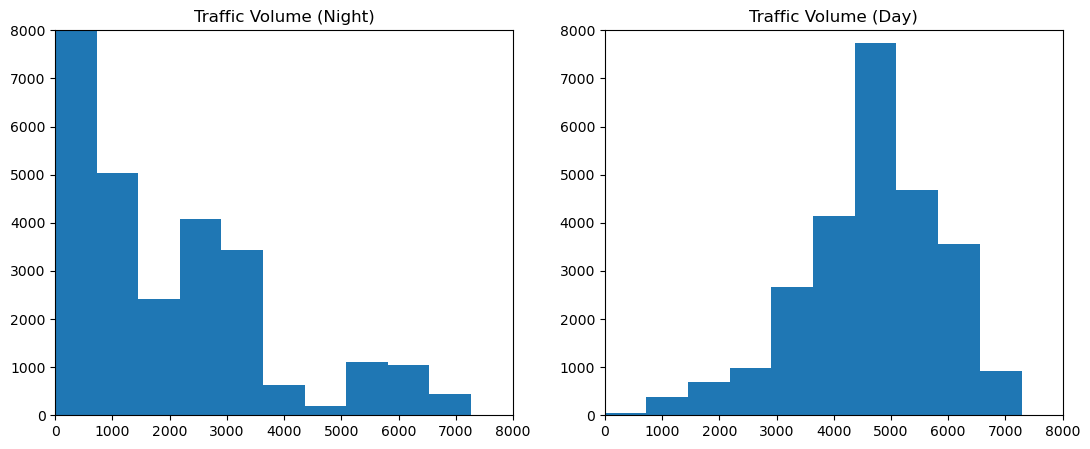

In [38]:
plt.figure(figsize= (13, 5))
                # width  height
plt.subplot(1, 2, 1)
plt.hist(night["traffic_volume"])
plt.title("Traffic Volume (Night)")
plt.xlim(0, 8000)
plt.ylim(0, 8000)

plt.subplot(1, 2, 2)
plt.hist(day["traffic_volume"])
plt.title("Traffic Volume (Day)")
plt.xlim(0, 8000)
plt.ylim(0, 8000)

plt.show()

In [39]:
night_description = night.traffic_volume.describe()
night_description

count    26406.000000
mean      2018.015375
std       1713.201969
min          0.000000
25%        581.000000
50%       1485.000000
75%       2934.000000
max       7260.000000
Name: traffic_volume, dtype: float64

In [40]:
day_description = day.traffic_volume.describe()
day_description

count    25838.000000
mean      4649.292360
std       1202.321987
min          0.000000
25%       4021.000000
50%       4736.000000
75%       5458.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [41]:
night_day_description = pd.DataFrame(night_description)

In [42]:
night_day_description.columns

Index(['traffic_volume'], dtype='object')

In [43]:
night_day_description.columns = ["Night"]

In [44]:
night_day_description

,Night
count,26406.000000
mean,2018.015375
std,1713.201969
min,0.000000
25%,581.000000
50%,1485.000000
75%,2934.000000
max,7260.000000


In [45]:
night_day_description["Day"] = day_description

In [46]:
night_day_description

,Night,Day
count,26406.000000,25838.000000
mean,2018.015375,4649.292360
std,1713.201969,1202.321987
min,0.000000,0.000000
25%,581.000000,4021.000000
50%,1485.000000,4736.000000
75%,2934.000000,5458.000000
max,7260.000000,7280.000000


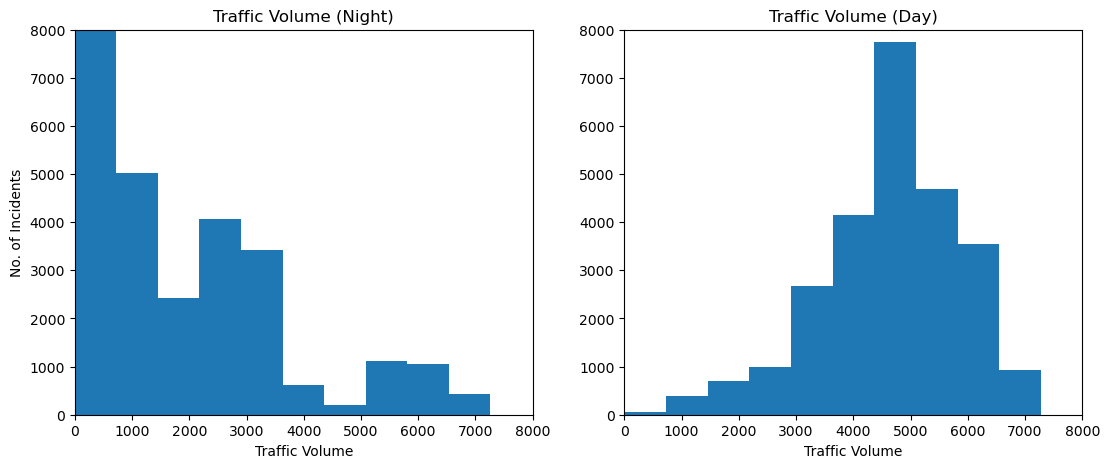

In [47]:
plt.figure(figsize= (13, 5))
                # width  height
plt.subplot(1, 2, 1)
plt.hist(night["traffic_volume"])
plt.title("Traffic Volume (Night)")
plt.xlim(0, 8000)
plt.ylim(0, 8000)
plt.ylabel("No. of Incidents")
plt.xlabel("Traffic Volume")

plt.subplot(1, 2, 2)
plt.hist(day["traffic_volume"])
plt.title("Traffic Volume (Day)")
plt.xlim(0, 8000)
plt.ylim(0, 8000)
plt.xlabel("Traffic Volume")

plt.show()

In [48]:
night.shape

(26406, 9)

In [49]:
day.shape

(25838, 9)

In [51]:
day.traffic_volume.value_counts(bins = 10)

(4368.0, 5096.0]               7737
(5096.0, 5824.0]               4677
(3640.0, 4368.0]               4152
(5824.0, 6552.0]               3553
(2912.0, 3640.0]               2673
(2184.0, 2912.0]                995
(6552.0, 7280.0]                925
(1456.0, 2184.0]                697
(728.0, 1456.0]                 381
(-7.281000000000001, 728.0]      48
Name: traffic_volume, dtype: int64

In [52]:
day.traffic_volume.value_counts(bins = 10).sort_index()

(-7.281000000000001, 728.0]      48
(728.0, 1456.0]                 381
(1456.0, 2184.0]                697
(2184.0, 2912.0]                995
(2912.0, 3640.0]               2673
(3640.0, 4368.0]               4152
(4368.0, 5096.0]               7737
(5096.0, 5824.0]               4677
(5824.0, 6552.0]               3553
(6552.0, 7280.0]                925
Name: traffic_volume, dtype: int64

In [53]:
night.traffic_volume.value_counts(bins = 10).sort_index()

(-7.261, 726.0]     8046
(726.0, 1452.0]     5027
(1452.0, 2178.0]    2423
(2178.0, 2904.0]    4079
(2904.0, 3630.0]    3418
(3630.0, 4356.0]     618
(4356.0, 5082.0]     200
(5082.0, 5808.0]    1110
(5808.0, 6534.0]    1049
(6534.0, 7260.0]     436
Name: traffic_volume, dtype: int64

# Time indicators

* Month
* Day of Week
* Time of Day

In [54]:
night

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
10,None,290.97,0.0,0.0,20,Clouds,few clouds,2012-10-02 19:00:00,3539
11,None,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784
12,None,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361
13,None,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529
14,None,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [58]:
night.date_time.dt.month.unique()

array([10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9], dtype=int64)

In [60]:
night.date_time.dt.month

10       10
11       10
12       10
13       10
14       10
         ..
48199     9
48200     9
48201     9
48202     9
48203     9
Name: date_time, Length: 26406, dtype: int64

In [62]:
night["month"] = night.date_time.dt.month

C:\Users\hp 840g6\AppData\Local\Temp\ipykernel_9108\1576208607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  night["month"] = night.date_time.dt.month


In [63]:
night

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month
10,None,290.97,0.0,0.0,20,Clouds,few clouds,2012-10-02 19:00:00,3539,10
11,None,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784,10
12,None,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361,10
13,None,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529,10
14,None,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963,10
...,...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,9
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,9
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,9
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,9


In [66]:
night.date_time.dt.strftime("%b")

10       Oct
11       Oct
12       Oct
13       Oct
14       Oct
        ... 
48199    Sep
48200    Sep
48201    Sep
48202    Sep
48203    Sep
Name: date_time, Length: 26406, dtype: object

In [67]:
night["month_name"] = night.date_time.dt.strftime("%b")

C:\Users\hp 840g6\AppData\Local\Temp\ipykernel_9108\422614285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  night["month_name"] = night.date_time.dt.strftime("%b")


In [68]:
night

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month,month_name
10,None,290.97,0.0,0.0,20,Clouds,few clouds,2012-10-02 19:00:00,3539,10,Oct
11,None,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784,10,Oct
12,None,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361,10,Oct
13,None,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529,10,Oct
14,None,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963,10,Oct
...,...,...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,9,Sep
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,9,Sep
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,9,Sep
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,9,Sep


In [70]:
groups = night.groupby("month_name")

In [74]:
groups["traffic_volume"].mean()

month_name
Apr    2036.222833
Aug    2154.896894
Dec    1782.938694
Feb    1961.179659
Jan    1842.462454
Jul    2064.510824
Jun    2186.719205
Mar    2055.475943
May    2083.808440
Nov    1905.199010
Oct    2071.930059
Sep    2049.581963
Name: traffic_volume, dtype: float64

In [75]:
groups = night.groupby("month")

In [76]:
by_month = groups["traffic_volume"].mean()
by_month

month
1     1842.462454
2     1961.179659
3     2055.475943
4     2036.222833
5     2083.808440
6     2186.719205
7     2064.510824
8     2154.896894
9     2049.581963
10    2071.930059
11    1905.199010
12    1782.938694
Name: traffic_volume, dtype: float64

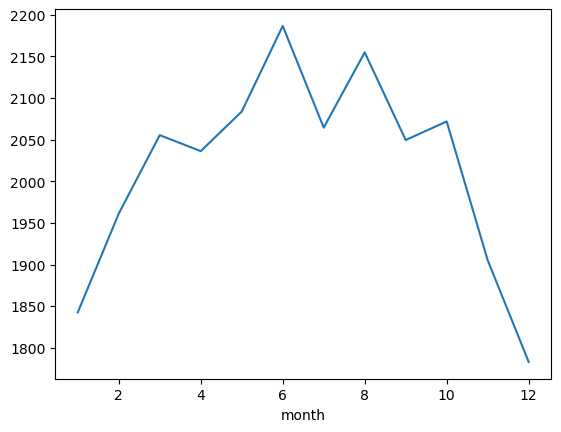

In [78]:
by_month.plot.line()
plt.show()

In [79]:
night.date_time.dt.year

10       2012
11       2012
12       2012
13       2012
14       2012
         ... 
48199    2018
48200    2018
48201    2018
48202    2018
48203    2018
Name: date_time, Length: 26406, dtype: int64

In [80]:
night["year"] = night.date_time.dt.year

C:\Users\hp 840g6\AppData\Local\Temp\ipykernel_9108\1601771190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  night["year"] = night.date_time.dt.year


In [81]:
night

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month,month_name,year
10,None,290.97,0.0,0.0,20,Clouds,few clouds,2012-10-02 19:00:00,3539,10,Oct,2012
11,None,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784,10,Oct,2012
12,None,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361,10,Oct,2012
13,None,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529,10,Oct,2012
14,None,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963,10,Oct,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,9,Sep,2018
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,9,Sep,2018
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,9,Sep,2018
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,9,Sep,2018


In [83]:
only_july = night[night["month"] == 7] 
only_july

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month,month_name,year
7343,None,289.58,0.0,0.0,8,Clear,sky is clear,2013-07-01 00:00:00,791,7,Jul,2013
7344,None,288.22,0.0,0.0,12,Clouds,few clouds,2013-07-01 01:00:00,444,7,Jul,2013
7345,None,287.66,0.0,0.0,12,Clouds,few clouds,2013-07-01 02:00:00,401,7,Jul,2013
7346,None,286.92,0.0,0.0,68,Clouds,broken clouds,2013-07-01 03:00:00,341,7,Jul,2013
7347,None,286.91,0.0,0.0,68,Clouds,broken clouds,2013-07-01 04:00:00,828,7,Jul,2013
...,...,...,...,...,...,...,...,...,...,...,...,...
46318,None,301.08,0.0,0.0,20,Clouds,few clouds,2018-07-31 19:00:00,3288,7,Jul,2018
46319,None,299.75,0.0,0.0,20,Clouds,few clouds,2018-07-31 20:00:00,3076,7,Jul,2018
46320,None,297.48,0.0,0.0,20,Clouds,few clouds,2018-07-31 21:00:00,2686,7,Jul,2018
46321,None,294.86,0.0,0.0,1,Clear,sky is clear,2018-07-31 22:00:00,2152,7,Jul,2018


In [84]:
only_july.groupby("year")["traffic_volume"].mean()

year
2013    2143.238443
2014    2103.328530
2015    2027.579281
2016    1862.361798
2017    2160.104294
2018    2096.247863
Name: traffic_volume, dtype: float64

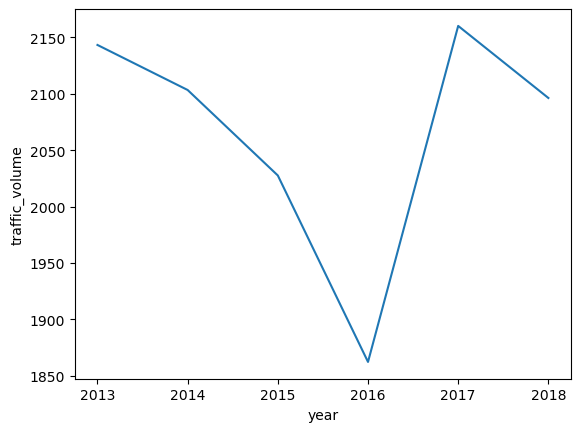

In [86]:
only_july.groupby("year")["traffic_volume"].mean().plot.line()
plt.ylabel("traffic_volume")
plt.show()